In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
##Python shortcut to folder path##
path = r'C:\Users\hazem\Master Folder- Airbnb Prices in European Cities'

In [4]:
## Importing Data Set ##
df_airbnb = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'AirBnb_Europe_Clean.csv'), index_col = False)

In [5]:
df_airbnb.shape

(51611, 14)

In [6]:
df_airbnb.columns

Index(['Unnamed: 0', 'city', 'days', 'accommodation', 'room_type',
       'person_capacity', 'cleanliness_rating', 'guest_rating', 'bedrooms',
       'city_distance', 'metro_distance', 'longitude', 'latitude',
       'Rating category'],
      dtype='object')

### Hypotheses:
### "The more cleanliness_rating increase, the more guest_rating increase"

### 3.Data prep for regression analysis

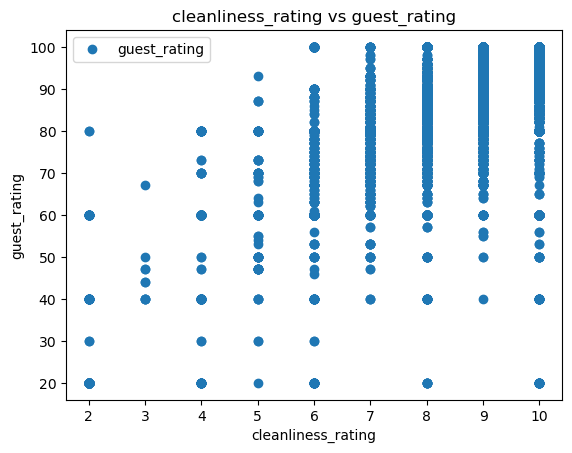

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_airbnb.plot(x = 'cleanliness_rating', y='guest_rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('cleanliness_rating vs guest_rating')  
plt.xlabel('cleanliness_rating')  
plt.ylabel('guest_rating')  
plt.show()

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_airbnb['cleanliness_rating'].values.reshape(-1,1)
y = df_airbnb['guest_rating'].values.reshape(-1,1)

In [11]:
X

array([[10],
       [ 8],
       [ 9],
       ...,
       [10],
       [10],
       [10]], dtype=int64)

In [12]:
y

array([[93],
       [85],
       [87],
       ...,
       [93],
       [87],
       [93]], dtype=int64)

In [13]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4.Regression analysis

In [14]:
# Create a regression object.

regression = LinearRegression()  
# This is the regression object, which will be fit onto the training set.

In [15]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

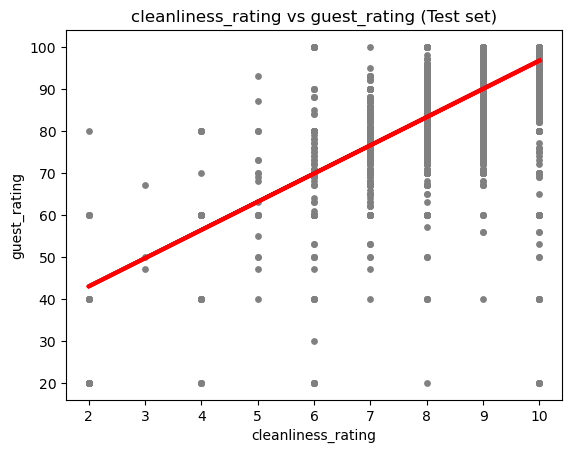

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('cleanliness_rating vs guest_rating (Test set)')
plot_test.xlabel('cleanliness_rating')
plot_test.ylabel('guest_rating')
plot_test.show()

In [19]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [20]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.72281422]]
Mean squared error:  39.74811974992994
R2 score:  0.49603759613426524


In [21]:
y_predicted

array([[96.7211743],
       [96.7211743],
       [96.7211743],
       ...,
       [96.7211743],
       [96.7211743],
       [96.7211743]])

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,80,96.721174
1,95,96.721174
2,96,96.721174
3,92,89.998360
4,89,89.998360
5,94,96.721174
6,95,89.998360
7,67,76.552732
8,100,83.275546
9,76,83.275546


#### Compare how the regression fits the training set¶

In [25]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.72281422]]
Mean squared error:  39.06849507614504
R2 score:  0.515390292509363


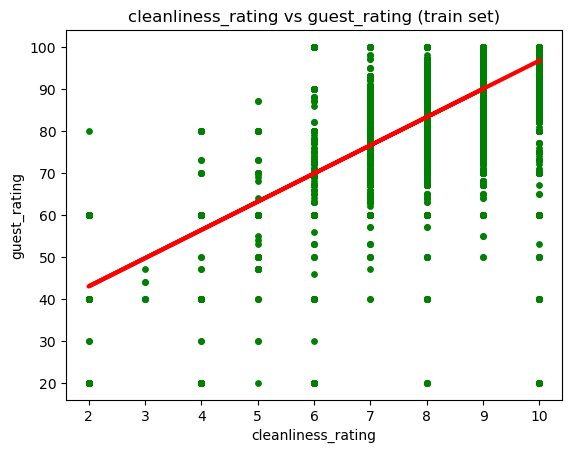

In [28]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('cleanliness_rating vs guest_rating (train set)')
plot_test.xlabel('cleanliness_rating')
plot_test.ylabel('guest_rating')
plot_test.show()

####  As there is no extreme values for both variables, And according to the above analysi,  It's clear after comparing predicted and actual values that linear regression  well fit the dataand the model has high prediction to the actual data

### Hypotheses: The more cleanliness_rating increase, the more guest_rating increase